# Stroke Prediction Dataset
### 11 clinical features por predicting stroke events

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

1) id: unique identifier    
2) gender: "Male", "Female" or "Other"    
3) age: age of the patient    
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension    
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease    
6) ever_married: "No" or "Yes"    
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"    
8) Residence_type: "Rural" or "Urban"     
9) avg_glucose_level: average glucose level in blood    
10) bmi: body mass index    
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*    
12) stroke: 1 if the patient had a stroke or 0 if not    
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient    

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
with open('healthcare-dataset-stroke-data.csv', 'r') as t:
    for _ in range(3):
        print(t.readline())

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke

9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1

51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1



In [5]:
ds = pd.read_csv('healthcare-dataset-stroke-data.csv', delimiter=',')

In [6]:
ds.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [7]:
ds.drop(['id'], axis=1, inplace=True)

In [7]:
ds.shape

(5110, 11)

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### gender

In [9]:
ds.gender.replace(['Male', 'Female'], [0, 1], inplace=True)

- Male - 0    
- Female - 1

In [10]:
ds.gender.value_counts()

1        2994
0        2115
Other       1
Name: gender, dtype: int64

In [11]:
ds.stroke[ds.gender == 'Other']

3116    0
Name: stroke, dtype: int64

#### "Other" in gender is collision    
the cell not filling accident    
this is one row and it refers to target == 0
this row can be removed

In [12]:
ds.drop([3116], inplace=True)

In [13]:
ds.gender = ds.gender.astype('int32', copy=False)

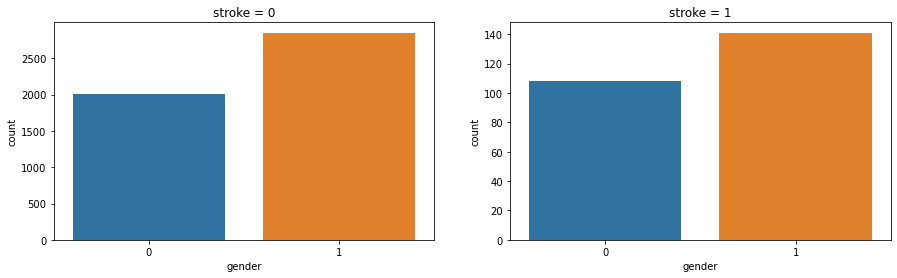

In [14]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(ds.gender[ds.stroke == 0])
plt.title('stroke = 0')
plt.subplot(122)
sns.countplot(ds.gender[ds.stroke == 1])
plt.title('stroke = 1');

#### hypertension

In [15]:
ds.hypertension.unique()

array([0, 1])

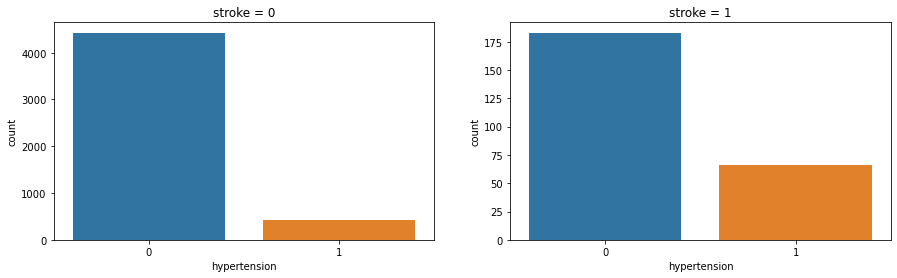

In [16]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(ds.hypertension[ds.stroke == 0].sort_values())
plt.title('stroke = 0')
plt.subplot(122)
sns.countplot(ds.hypertension[ds.stroke == 1].sort_values())
plt.title('stroke = 1')
plt.show()

#### heart_disease

In [17]:
ds.heart_disease.unique()

array([1, 0])

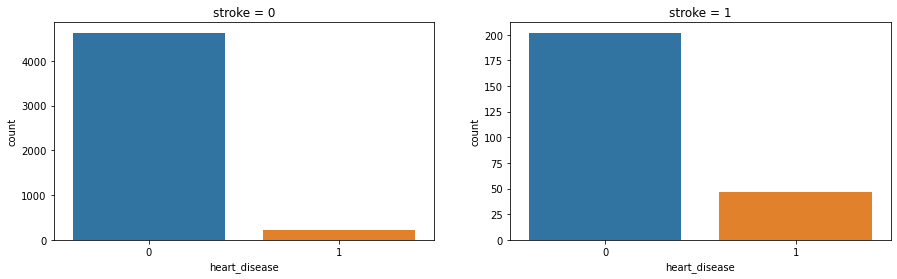

In [18]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(ds.heart_disease[ds.stroke == 0].sort_values())
plt.title('stroke = 0')
plt.subplot(122)
sns.countplot(ds.heart_disease[ds.stroke == 1].sort_values())
plt.title('stroke = 1')
plt.show()

#### ever_married

In [19]:
ds.ever_married.unique()

array(['Yes', 'No'], dtype=object)

- Yes - 1     
- No - 0

In [20]:
ds.ever_married.replace(['Yes', 'No'], [1, 0], inplace=True)

In [21]:
ds.ever_married = ds.ever_married.astype('int32', copy=False)

In [22]:
ds.ever_married.value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

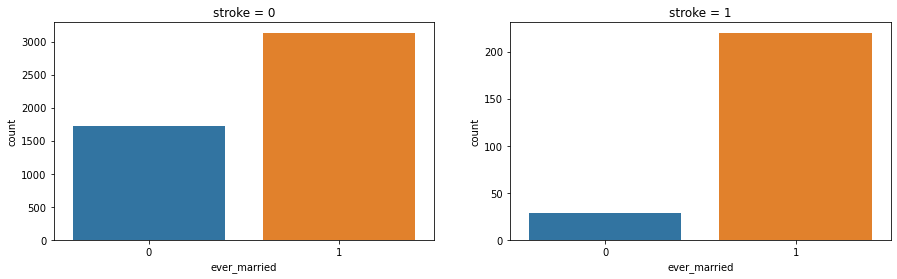

In [23]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(ds.ever_married[ds.stroke == 0])
plt.title('stroke = 0')
plt.subplot(122)
sns.countplot(ds.ever_married[ds.stroke == 1])
plt.title('stroke = 1');

#### work_type

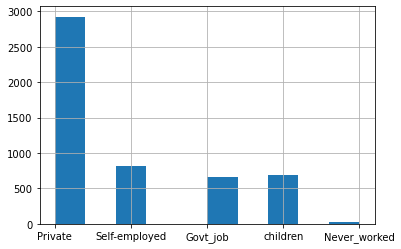

In [24]:
ds.work_type.hist();

In [25]:
ds.work_type[ds.work_type == 'Never_worked'].shape

(22,)

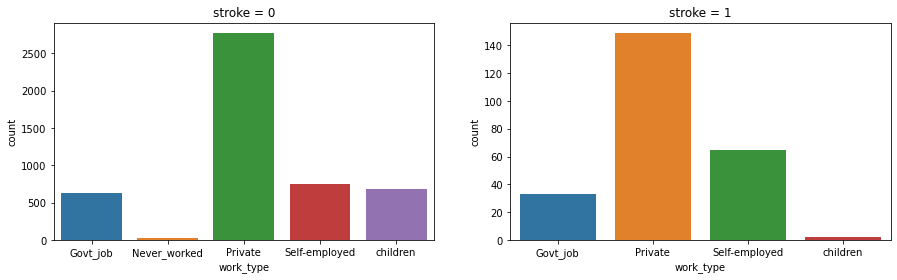

In [26]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(ds.work_type[ds.stroke == 0].sort_values())
plt.title('stroke = 0')
plt.subplot(122)
sns.countplot(ds.work_type[ds.stroke == 1].sort_values())
plt.title('stroke = 1')
plt.show()

- Govt_job - 0     
- Never_worked - 1     
- Private - 2    
- Self-employed - 3    
- Children -4

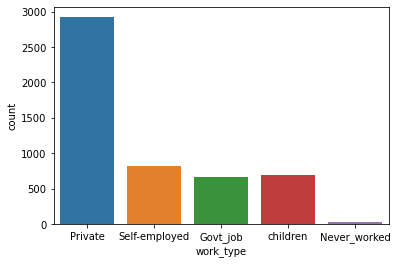

In [27]:
sns.countplot(ds.work_type);

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
ord_enc = OrdinalEncoder()

In [30]:
ds['work_type'] = ord_enc.fit_transform(ds[['work_type']])

#### Residence_type

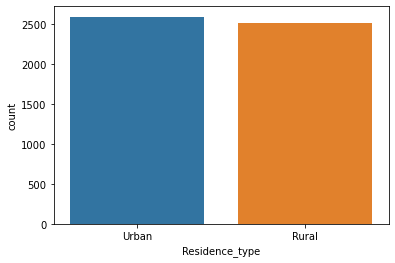

In [31]:
sns.countplot(ds.Residence_type);

- Urban - 0    
- Rural - 1

In [32]:
ds.Residence_type.replace(['Urban', 'Rural'], [0, 1], inplace=True)

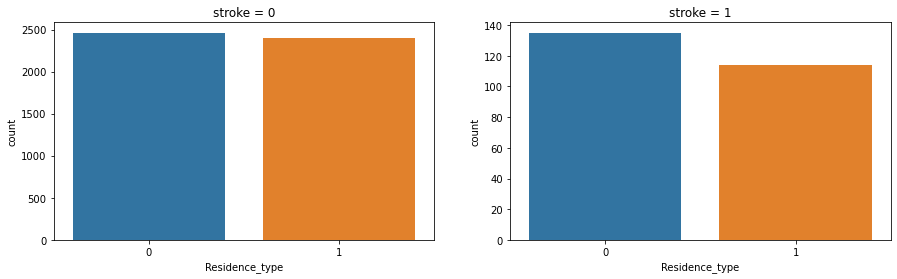

In [33]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(ds.Residence_type[ds.stroke == 0])
plt.title('stroke = 0')
plt.subplot(122)
sns.countplot(ds.Residence_type[ds.stroke == 1])
plt.title('stroke = 1')
plt.show()

#### BMI

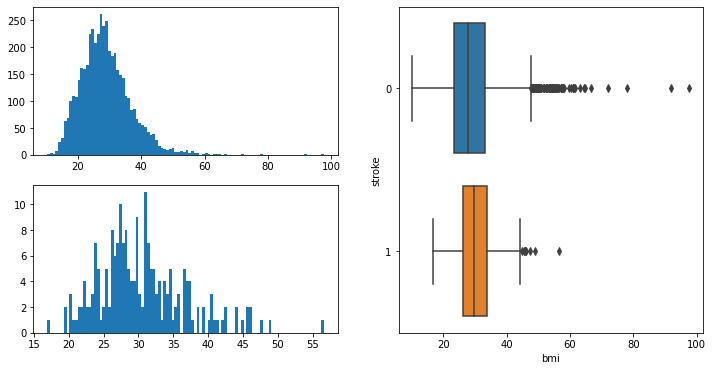

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.hist(ds.bmi[ds.stroke == 0], bins=100)
plt.subplot(223)
plt.hist(ds.bmi[ds.stroke == 1], bins=100)
plt.subplot(122)
sns.boxplot(data=ds, y='stroke', x='bmi', orient='h')
plt.show()

#### smoking_status

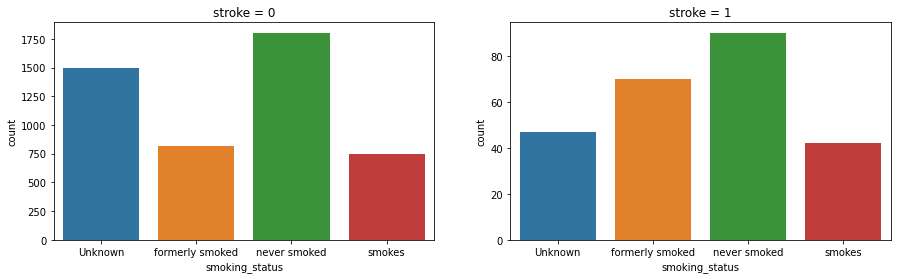

In [35]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(ds.smoking_status[ds.stroke == 0].sort_values())
plt.title('stroke = 0')
plt.subplot(122)
sns.countplot(ds.smoking_status[ds.stroke == 1].sort_values())
plt.title('stroke = 1')
plt.show()

In [36]:
ds.smoking_status.replace(['Unknown', 'formerly smoked', 'never smoked', 'smokes'], 
                          [0, 1, 2, 3], inplace=True)

- Unknown - 0    
- formerly smoked - 1           
- never smoked - 2      
- smokes - 3

In [37]:
ds.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,2.0,0,228.69,36.6,1,1
1,1,61.0,0,0,1,3.0,1,202.21,NaN,2,1
2,0,80.0,0,1,1,2.0,1,105.92,32.5,2,1
3,1,49.0,0,0,1,2.0,0,171.23,34.4,3,1
4,1,79.0,1,0,1,3.0,1,174.12,24.0,2,1


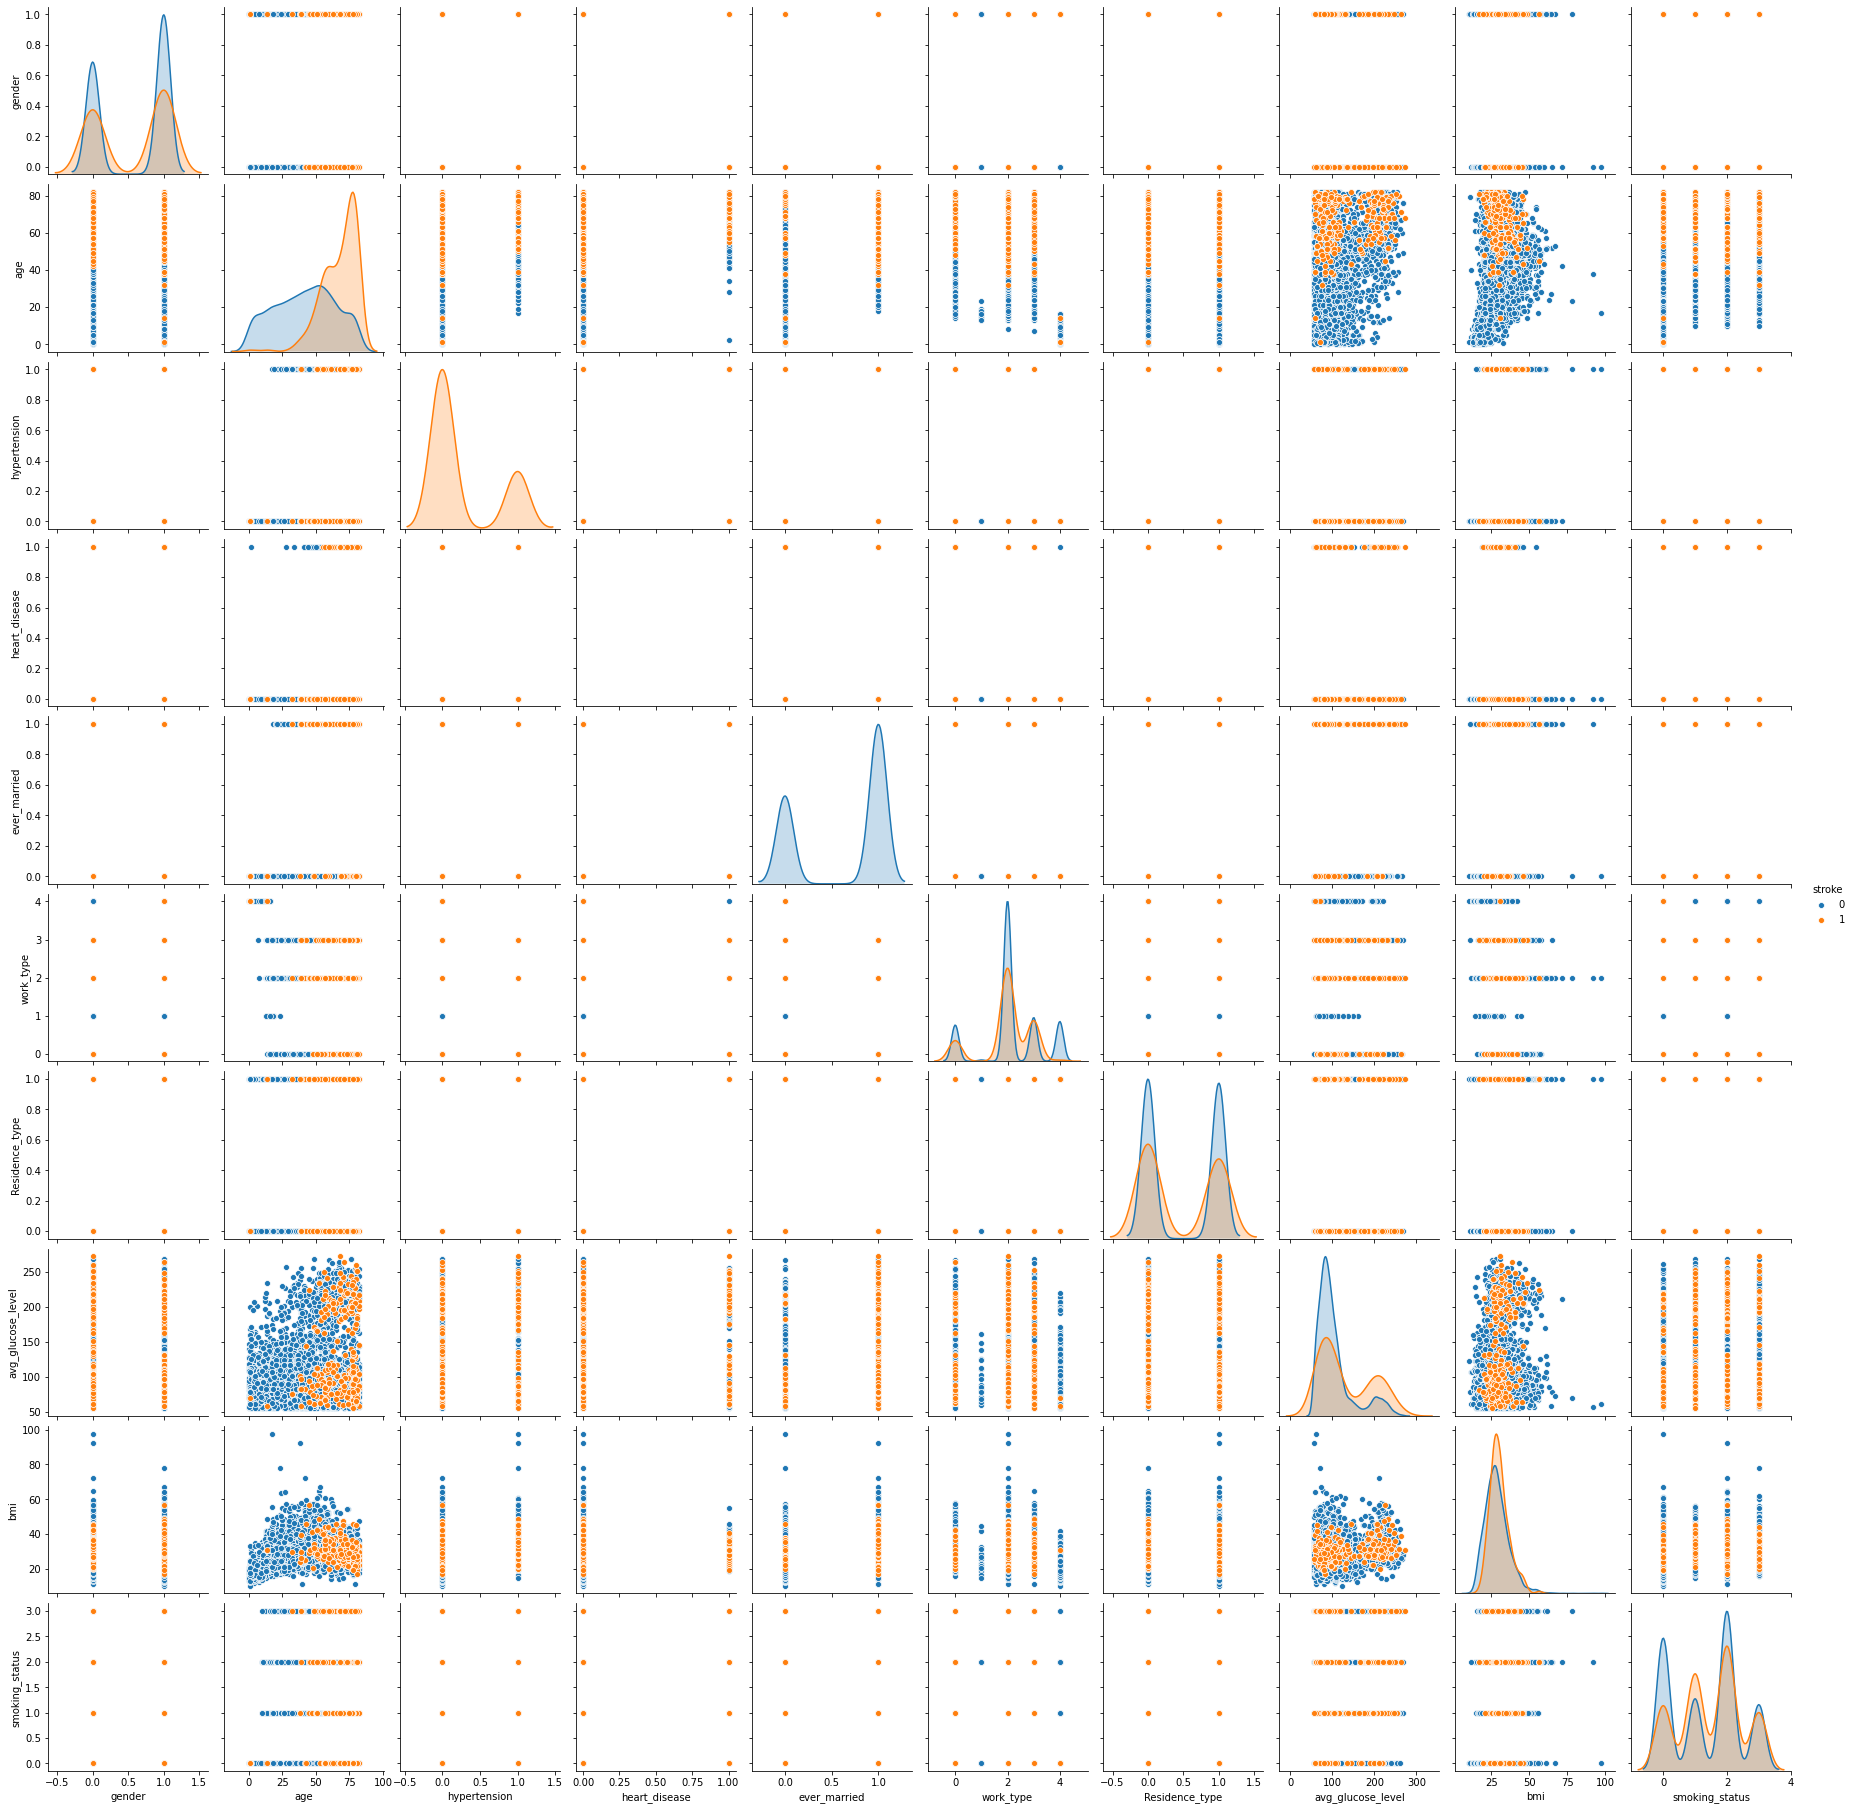

In [40]:
sns.pairplot(ds, hue='stroke');

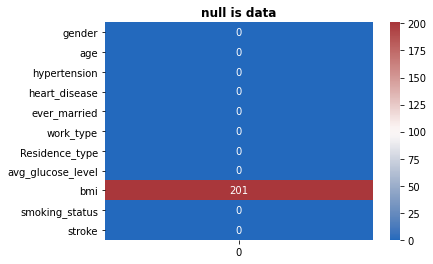

In [9]:
plt.title('null is data', fontweight='bold')
sns.heatmap(ds.isnull().sum().to_frame(), annot=True, fmt='d', cmap='vlag')
plt.show()

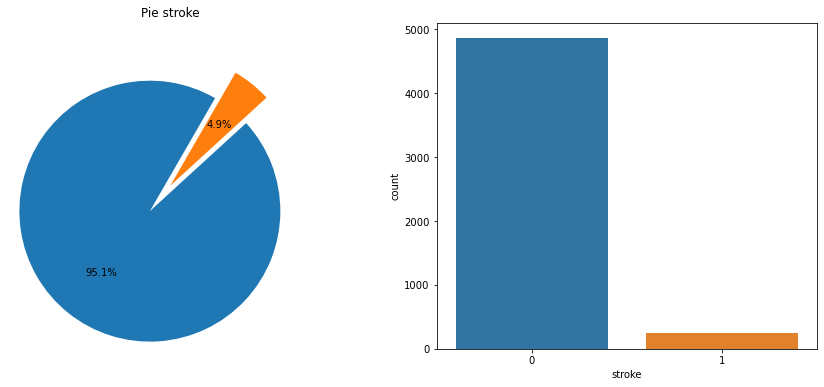

In [42]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.pie(ds.stroke.value_counts(), explode=(0.25, 0.0), autopct='%1.1f%%', startangle=60)
plt.title('Pie stroke')
plt.subplot(122)
sns.countplot(ds.stroke)
plt.show()

In [43]:
ds.stroke.value_counts(normalize=True)

0    0.951262
1    0.048738
Name: stroke, dtype: float64

In [44]:
ds.stroke[ds.stroke == 1].count()

249

#### Where is null

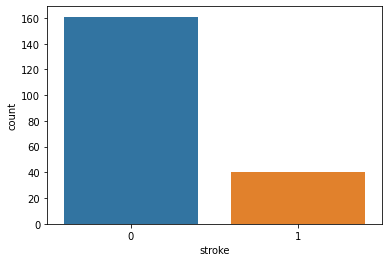

In [45]:
sns.countplot(ds.stroke[ds.bmi.fillna(9999) == 9999]);

#### correlation

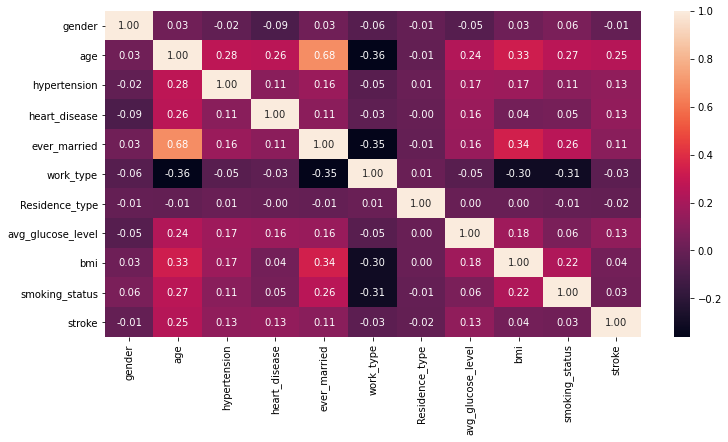

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(ds.corr(), annot=True, fmt='.2f');

#### Age

In [24]:
fig = px.histogram(ds, x='age', nbins=100, title='Age', 
                   color_discrete_sequence=px.colors.qualitative.Antique, 
                  marginal='box', color='stroke', height=400, width=700)

fig.update_layout(bargap=0.1)

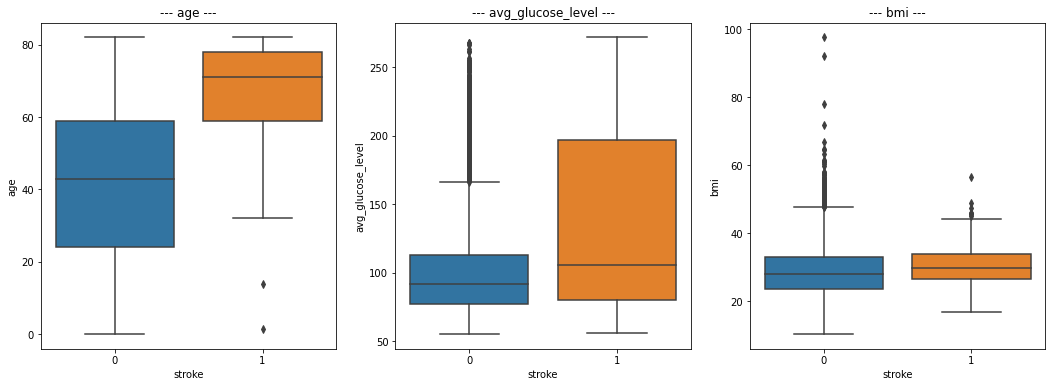

In [47]:
plt.figure(figsize=(18, 6))
col = ['age', 'avg_glucose_level', 'bmi']

for i, c in enumerate(col):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=ds, x='stroke', y=c)
    plt.title('--- {} ---'.format(c))

#### fillna -> bmi

In [48]:
def replace_nan(data, to_replace, replacement_data):
    
    data_def = data.copy(deep=True)
    
    index_zero = list(data_def[to_replace][data_def[replacement_data] == 0].index)
    index_one = list(data_def[to_replace][data_def[replacement_data] == 1].index)
    
    for i in range(2):
        minimum = data_def[to_replace][data_def[replacement_data] == i].quantile(0.25)
        maximum = data_def[to_replace][data_def[replacement_data] == i].quantile(0.75)
        
        minimum -= (maximum - minimum) * 0.5
        maximum += (maximum - minimum) * 0.5
    
        count = data_def[to_replace][data_def[replacement_data] == i].isnull().sum()
        
        data_for_nan = np.random.choice(range(int(minimum), int(maximum)), count)
    
        if i == 0:
            index_null = data_def[to_replace][index_zero][data_def[to_replace].isnull()].index
        else:
            index_null = data_def[to_replace][index_one][data_def[to_replace].isnull()].index
        
        data_def[to_replace][index_null] = data_for_nan
        
    return data_def

In [49]:
ds = replace_nan(ds, 'bmi', 'stroke')

In [50]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int32  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int32  
 5   work_type          5109 non-null   float64
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(4), int32(2), int64(5)
memory usage: 599.1 KB


In [51]:
ds.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,2.0,0,228.69,36.6,1,1
1,1,61.0,0,0,1,3.0,1,202.21,25.0,2,1
2,0,80.0,0,1,1,2.0,1,105.92,32.5,2,1


In [52]:
ds.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [53]:
columns_numeric = ['age', 'avg_glucose_level', 'bmi']
columns_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                       'work_type', 'Residence_type', 'smoking_status']
columns_target = ['stroke']

### small conclusions      
- People who have hypertension and heart disease are predisposed to stroke.     
- The data shows that single people are less susceptible to stroke, although this is possible due to the fact that, that in adulthood, almost all people have families, and single people are usually young.        
- Age data shows that people are susceptible to stroke from the age of 40 to the end of their lives.           
- The influence of the profession. The data show that self employed entrepreneurs are more likely to have a heart attack.      
- Type of residence. Urban residents are slightly more susceptible to heart attacks than rural residents.       
- BMI - has almost no effect on the disease.       
- Smoking. former smokers are more susceptible to stroke. Although it is possible that they became exes because there were health problems, in particular with the heart, which led to an increase in the share of this factor.      